<a href="https://colab.research.google.com/github/Sandwhaletree/2023.05_Tibame/blob/main/A12_%E9%80%B2%E9%9A%8E%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92_%E6%9D%8E%E6%99%BA%E6%8F%9A/014_PyTorch_Linear_MINST_0808.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic module
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm # progress bar

# PyTorch
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms # 資料前處理

In [2]:
# print version of PyTorch
torch.__version__, torchvision.__version__

('2.0.1+cu118', '0.15.2+cu118')

執行階段 -> 變更執行階段類型

In [3]:
!nvidia-smi

Tue Aug  8 01:31:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#### Prepare CIFAR10 Dataset

*   torch vision datasets: https://pytorch.org/vision/stable/datasets.html
*   CIFAR10 label

0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck

In [9]:
# Define Parameters
NUM_CLASS = 10
# Class name and class mapping
class_names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]
class_map = {cls: i for i, cls in enumerate(class_names)}
print(class_map)

{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


In [8]:
# Define Parameters
NUM_CLASS = 10

#### torch.utils.data.Dataset

https://pytorch.org/docs/stable/data.html?highlight=dataset#torch.utils.data.Dataset

*   read **1** sample (img, label)
*   Convert to **Torch.Tensor**
* Datasets provided by torchvision https://pytorch.org/vision/stable/datasets.html


In [4]:
# Download dataset
train_ds = torchvision.datasets.MNIST('data', # saved path
    train=True, # training or testing set
    download=True # download dataset from internet
)
val_ds = torchvision.datasets.MNIST('data',
    train=False,
    download=True
)

100%|██████████| 9912422/9912422 [00:00<00:00, 87113519.59it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 89399036.03it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26513820.28it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21143761.12it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [5]:
# Check your dataset
print('Number of training   samples:', len(train_ds))
print('Number of validation samples:', len(val_ds))

Number of training   samples: 60000
Number of validation samples: 10000


In [6]:
# Random select a sample
idx = np.random.randint(low=0, high=len(train_ds))
img, label = train_ds[idx]

# Type of img and label
print(idx)
print(type(img), type(label))

13176
<class 'PIL.Image.Image'> <class 'int'>


img shape:  (28, 28)
label:  8
class name:  ship


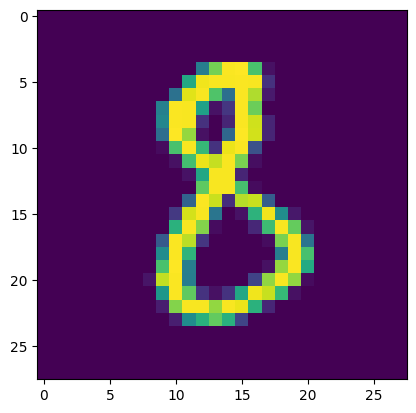

In [10]:
# Convert to np.ndarray and show image
img_np = np.array(img)
print('img shape: ', img_np.shape)
print('label: ', label)
print('class name: ', class_names[label])
plt.imshow(img_np)
plt.show()

#### Data Proprocess



1.   Convert **PIL.Image** to **torch.FloatTensor** (張量)
  

*   Converts a **PIL Image or numpy.ndarray** (H, W, C) in the range [0, 255] to a **torch.FloatTensor** of shape (C, H, W) in the range [0.0, 1.0]

2.   TODO: Data Augmentation, ... etc



In [11]:
preprocess = transforms.Compose([
    transforms.ToTensor(), # Convert to Tensor
    # ...
])

In [14]:
# Build dataset with data preprocess
train_ds = torchvision.datasets.MNIST('data',
    train=True,
    download=True,
    transform=preprocess)
val_ds = torchvision.datasets.MNIST('data',
    train=False,
    download=True,
    transform=preprocess)

In [15]:
# Random select a sample
idx = np.random.randint(low=0, high=len(train_ds))
img, label = train_ds[idx]

# Type of img and label
print(idx)
print(type(img), type(label))
print(img.shape)

14087
<class 'torch.Tensor'> <class 'int'>
torch.Size([1, 28, 28])


#### Combine Dataset with DataLoader

**torch.utils.data.DataLoader**: https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

* form a **batch**
* data sampler
* reading order (shuffle)

In [16]:
# Use DataLoader to generate minibatches
BATCH_SIZE = 256
train_dataloader = torch.utils.data.DataLoader(
    train_ds,
    batch_size=BATCH_SIZE,
    shuffle=True)
val_dataloader = torch.utils.data.DataLoader(
    val_ds,
    batch_size=BATCH_SIZE)

Check shape of data

N: number of samples

C: channels

H: Height

W: Width

**PyTorch use channel first !**

In [ ]:
for x, y in train_dataloader:
    print("type ", type(x), type(y))
    print("Shape of x [N, C, H, W]: ", x.shape, x.dtype)
    print("Shape of y [N]: ", y.shape, y.dtype)
    break

In [ ]:
# permute: [C, H, W] -> [H, W, C]
plt.imshow(x[0].permute(1, 2, 0)), y[0]

#### Build Model

In [27]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

IMG_SIZE = 32

Using device: cuda


nn.Sequential

In [28]:
model = nn.Sequential(
    nn.Flatten(), # (C, H, W) -> (C*H*W)
    nn.Linear(in_features=IMG_SIZE*IMG_SIZE*3, out_features=64), # (C*H*W) -> (64)
    nn.ReLU(), # activation
    nn.Linear(64, 128), # (64) -> (128)
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, NUM_CLASS), # (128) -> NUM_CLASS
)

nn.Module Subclass

In [41]:
# Define model
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),  # (C*H*W) -> (64)
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, padding=1), # (64) -> (128)
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, padding=1), # (64) -> (128)
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
        )
        self.classifier=nn.Sequential(
            nn.Linear(64,10)
        )
    def feature(self,x):
        return self.encoder(x)

    def forward(self, x):
        x = self.feature(x)
        logits = self.classifier(x)
        return logits

In [42]:
# init model and move to GPU device
model = NeuralNet().to(device)

In [43]:
# Print basic model architecture
print(model)

NeuralNet(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): AdaptiveAvgPool2d(output_size=1)
    (8): Flatten(start_dim=1, end_dim=-1)
  )
  (classifier): Sequential(
    (0): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [45]:
# Use torchsummary to print advanced info
import torchsummary

torchsummary.summary(model, input_size=(1, 3, 3))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1             [-1, 16, 3, 3]             160
              ReLU-2             [-1, 16, 3, 3]               0
            Conv2d-3             [-1, 32, 3, 3]           4,640
              ReLU-4             [-1, 32, 3, 3]               0
            Conv2d-5             [-1, 64, 3, 3]          18,496
              ReLU-6             [-1, 64, 3, 3]               0
         MaxPool2d-7             [-1, 64, 1, 1]               0
 AdaptiveAvgPool2d-8             [-1, 64, 1, 1]               0
           Flatten-9                   [-1, 64]               0
           Linear-10                   [-1, 10]             650
Total params: 23,946
Trainable params: 23,946
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 0.09
Estimated Tot

In [47]:
# Use torchinfo to print advanced info
!pip install torchinfo

import torchinfo
torchinfo.summary(model, input_size=(BATCH_SIZE, 1, 3, 3))

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNet                                [256, 10]                 --
├─Sequential: 1-1                        [256, 64]                 --
│    └─Conv2d: 2-1                       [256, 16, 3, 3]           160
│    └─ReLU: 2-2                         [256, 16, 3, 3]           --
│    └─Conv2d: 2-3                       [256, 32, 3, 3]           4,640
│    └─ReLU: 2-4                         [256, 32, 3, 3]           --
│    └─Conv2d: 2-5                       [256, 64, 3, 3]           18,496
│    └─ReLU: 2-6                         [256, 64, 3, 3]           --
│    └─MaxPool2d: 2-7                    [256, 64, 1, 1]           --
│    └─AdaptiveAvgPool2d: 2-8            [256, 64, 1, 1]           --
│    └─Flatten: 2-9                      [256, 64]                 --
├─Sequential: 1-2                        [256, 10]                 --
│    └─Linear: 2-10                      [256, 10]                 650
Total 

#### Training: Optimizing the Model Parameters

In [48]:
loss_fn = nn.CrossEntropyLoss() # Softmax + negative log likelihood loss (nn.NLLLoss)
optimizer = torch.optim.SGD(
    params=model.parameters(), # parameters to optimize
    lr=1e-2, # learning rate: 1e-4, 1e-2...
)

In [49]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset) # number of samples
    num_batches = len(dataloader) # batches per epoch

    model.train() # to training mode.
    epoch_loss, epoch_correct = 0, 0
    for batch_i, (x, y) in enumerate(tqdm(dataloader, leave=False)):
        x, y = x.to(device), y.to(device) # move data to device

        # zero the parameter gradients
        optimizer.zero_grad()

        # Compute prediction loss
        pred = model(x)
        loss = loss_fn(pred, y)

        # Optimization by gradients
        loss.backward() # backpropagation to compute gradients
        optimizer.step() # update model params

        # write to logs
        epoch_loss += loss.item() # tensor -> python value
        # (N, Class)
        epoch_correct += (pred.argmax(dim=1) == y).sum().item()

    # return avg loss of epoch, acc of epoch
    return epoch_loss/num_batches, epoch_correct/size


def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset) # number of samples
    num_batches = len(dataloader) # batches per epoch

    model.eval() # model to test mode.
    epoch_loss, epoch_correct = 0, 0

    # No gradient for test data
    with torch.no_grad():
        for batch_i, (x, y) in enumerate(tqdm(dataloader, leave=False)):
            x, y = x.to(device), y.to(device)

            # Compute prediction loss
            pred = model(x)
            loss = loss_fn(pred, y)

            # write to logs
            epoch_loss += loss.item()
            epoch_correct += (pred.argmax(1) == y).sum().item()

    return epoch_loss/num_batches, epoch_correct/size

In [50]:
EPOCHS = 10
logs = {
    'train_loss': [], 'train_acc': [],
    'val_loss': [], 'val_acc': []
}
for epoch in tqdm(range(EPOCHS)):
    train_loss, train_acc = train(train_dataloader, model, loss_fn, optimizer)
    val_loss, val_acc = test(val_dataloader, model, loss_fn)

    print(f'EPOCH: {epoch} \
    train_loss: {train_loss:.4f}, train_acc: {train_acc:.3f} \
    val_loss: {val_loss:.4f}, val_acc: {val_acc:.3f} ')

    logs['train_loss'].append(train_loss)
    logs['train_acc'].append(train_acc)
    logs['val_loss'].append(val_loss)
    logs['val_acc'].append(val_acc)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

EPOCH: 0     train_loss: 2.3033, train_acc: 0.099     val_loss: 2.3024, val_acc: 0.098 


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

EPOCH: 1     train_loss: 2.3018, train_acc: 0.099     val_loss: 2.3013, val_acc: 0.098 


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

EPOCH: 2     train_loss: 2.3010, train_acc: 0.124     val_loss: 2.3006, val_acc: 0.114 


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

EPOCH: 3     train_loss: 2.3004, train_acc: 0.112     val_loss: 2.3001, val_acc: 0.114 


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

EPOCH: 4     train_loss: 2.2999, train_acc: 0.112     val_loss: 2.2996, val_acc: 0.114 


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

EPOCH: 5     train_loss: 2.2994, train_acc: 0.112     val_loss: 2.2990, val_acc: 0.114 


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

EPOCH: 6     train_loss: 2.2988, train_acc: 0.112     val_loss: 2.2984, val_acc: 0.114 


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

EPOCH: 7     train_loss: 2.2980, train_acc: 0.112     val_loss: 2.2975, val_acc: 0.114 


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

EPOCH: 8     train_loss: 2.2970, train_acc: 0.113     val_loss: 2.2962, val_acc: 0.115 


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

EPOCH: 9     train_loss: 2.2955, train_acc: 0.125     val_loss: 2.2944, val_acc: 0.138 


#### Logs

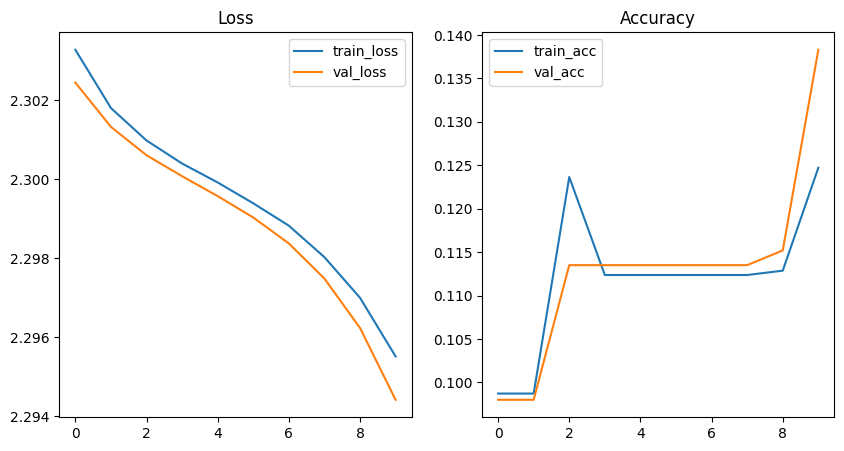

In [53]:
# Plot loss curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(logs['train_loss'])
plt.plot(logs['val_loss'])
plt.legend(['train_loss', 'val_loss'])
# plot acc
plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(logs['train_acc'])
plt.plot(logs['val_acc'])
plt.legend(['train_acc', 'val_acc'])
plt.show()

#### Save Model

Saving & Loading Model (weights only)

**Recommended**

In [ ]:
# model parameters
model.state_dict()

In [ ]:
PATH = './model_weights.pth' # .pth or .pt
# save weights
torch.save(model.state_dict(), PATH)

# load weights
model.load_state_dict(torch.load(PATH))

Saving & Loading Model (entire model)

In [ ]:
MODEL_PATH = './model.pth'
# save model
torch.save(model, MODEL_PATH)
# load model
model = torch.load(MODEL_PATH)

#### Evaluation

In [55]:
# load model
model = NeuralNet()

model.load_state_dict(torch.load(PATH))
model.eval()

NameError: ignored

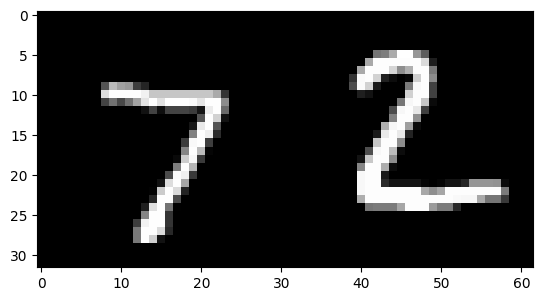

In [56]:
# take first 2 images
n = 2
for (images, labels) in val_dataloader:
    images, labels = images[:n], labels[:n]
    images_grid = torchvision.utils.make_grid(images[:n])
    images_grid = images_grid.permute(1, 2, 0) # (C, H, W) -> (H, W, C)
    plt.imshow(images_grid.numpy())
    break

In [ ]:
# take first 2 images
n = 2
for (images, labels) in val_dataloader:
    images, labels = images[:n], labels[:n]
    break

# Predict by model
with torch.no_grad():
    pred = model(images) # predict logits
print('raw_prediction logtis', pred, pred.shape, sep="\n")

In [ ]:
pred_softmax = nn.Softmax(dim=1)(pred) # probabilities
print('prediction after softmax', pred_softmax, pred_softmax.shape, sep="\n")

In [ ]:
# max_prob: max probability of each samples
# predicted_cls: the index of max prob
max_prob, predicted_cls = torch.max(pred_softmax, dim=1)

In [ ]:
predicted_cls = pred_softmax.argmax(dim=1)

In [ ]:
predicted_cls

In [ ]:
pred_softmax.argmax(dim=1)

In [ ]:
print('GroundTruth: ', ' '.join(class_names[labels[j]] for j in range(n)))
print('Prediction: ', ' '.join(class_names[predicted_cls[j]] for j in range(n)))

#### Evaluation

In [51]:
_ = model.eval()

In [58]:
features = []
labels = []
for x, y in tqdm(val_dataloader):
  x = x.to(device)
  feature = model.feature(x)
  features.append(feature)
  labels.append(label)

features = torch.cat(features, dim=0).cpu().numpy()

  0%|          | 0/40 [00:00<?, ?it/s]

RuntimeError: ignored

In [59]:
labels= torch.cat(labels, dim=0).numpy()

RuntimeError: ignored

In [ ]:
features.sahpe, labels.sahpe